## VERIFICAR QUAIS ARQUIVOS SERÃO ESSENCIAIS PARA RESPONDER A QUESTÃO:
# - Para abrir um e-commerce de um produto x estamos analisando o ticket médio de compra das pessoas e qual região do brasil
#   compra mais de comercios digitais. A justificativa desta investigação é que iremos direcionar nossas propagandas patrocinadas
#   para a região que - primeiramente compra mais do mercado digital; em segundo, possui ticket médio adequado ao nosso produto (a definir)


# quais tabelas serão utilizadas?
# -
'''
1. olist_customers_dataset.csv --> costumer_id, customer_zip_code_prefix
2. olist_geolocation_dataset.csv --> zip_code_prefix
3. olist_order_items_dataset.csv --> order_id, product_id
4. olist_products_dataset.csv --> product_id
5. product_category_name_translation.csv --> utilizado apenas para verificar o ranking do nosso produto (a escolher)
'''

# cruzar o preço por produto e quantidade de vendas por região

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
df_customers = pd.read_csv('/content/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
df_items = pd.read_csv('/content/olist_order_items_dataset.csv')
df_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
df_category = pd.read_csv('/content/product_category_name_translation.csv')

In [ ]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# cruzando os dados do df_customers com os dados df_geolocation
df_customers_geo = pd.merge(df_customers, df_geolocation, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')

In [ ]:
# juntando as tabelas necessárias para a análise proposta
df_customers_order = pd.merge(df_customers, df_orders, how='inner', on='customer_id')
df_customer_item = pd.merge(df_customers_order, df_items, how='inner', on='order_id')
df_customer_final = pd.merge(df_customer_item, df_products, how='inner', on='product_id')


In [ ]:
df_customer_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [ ]:
# verificar colunas no total
df_customer_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
############################################################################################
'''
Extrair colunas necessárias:
1. customer_id
2. customer_unique_id
3. customer_city
4. customer_state
5. order_id
6. product_id
7. product_category_name
8. price
'''
############################################################################################

'\nExtrair colunas necessárias:\n1. customer_id\n2. customer_unique_id\n3. customer_city\n4. customer_state\n5. order_id\n6. product_id\n7. product_category_name\n8. price\n'

In [ ]:
# criar novo dataframe dropando as colunas desnecessárias
data_ecommerce = pd.DataFrame ({
    'customer_id': df_customer_final['customer_id'],
    'customer_unique_id': df_customer_final['customer_unique_id'],
    'customer_city': df_customer_final['customer_city'],
    'customer_state': df_customer_final['customer_state'],
    'order_id': df_customer_final['order_id'],
    'product_id': df_customer_final['product_id'],
    'product_category_name': df_customer_final['product_category_name'],
    'price': df_customer_final['price']
})

In [ ]:
#
data_ecommerce.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,product_id,product_category_name,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,230.00


In [ ]:
data_ecommerce.dtypes

,0
customer_id,object
customer_unique_id,object
customer_city,object
customer_state,object
order_id,object
product_id,object
product_category_name,object
price,float64


In [ ]:
data_ecommerce.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_city,0
customer_state,0
order_id,0
product_id,0
product_category_name,1603
price,0


In [ ]:
df_geolocation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [ ]:
df_products['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_items.head() # cruzar com produtos para validar os preços

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_geolocation[['geolocation_city', 'geolocation_zip_code_prefix']].value_counts()

geolocation_city  geolocation_zip_code_prefix
niteroi           24220                          997
                  24230                          969
ubatuba           11680                          879
rio de janeiro    22631                          832
belo horizonte    30140                          810
                                                ... 
são paulo         3895                             1
japeri            26473                            1
são paulo         3906                             1
                  3907                             1
* cidade          81470                            1
Name: count, Length: 27907, dtype: int64

In [ ]:
df_products.head() # Sim

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [ ]:
df_payments.head() # N

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_payments.count()

,0
order_id,103886
payment_sequential,103886
payment_type,103886
payment_installments,103886
payment_value,103886


In [ ]:
df_reviews.head() # N

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_orders.head() # N

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_category.head() # N

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
ticket_medio = data_ecommerce.groupby(['customer_state']).agg({'price': 'mean'}).reset_index()


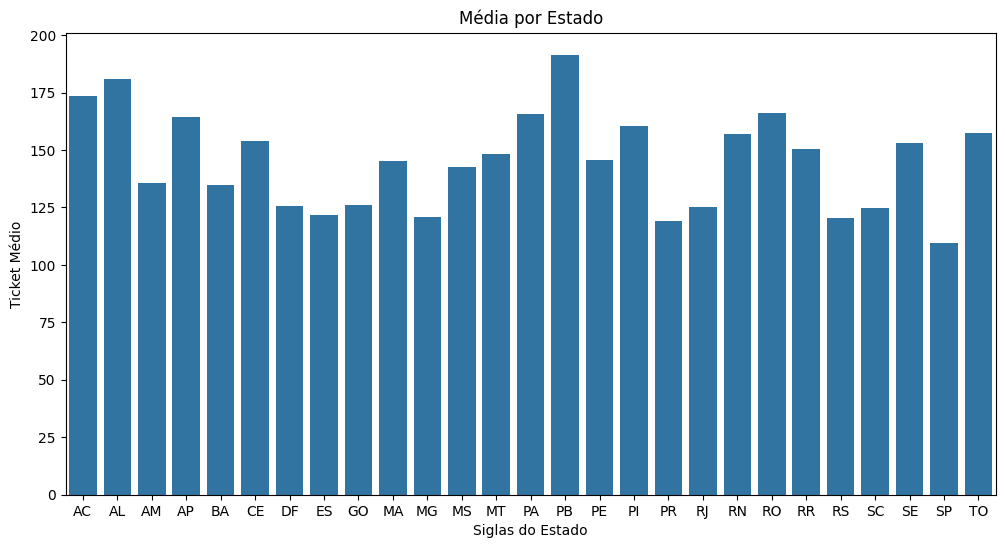

In [ ]:
plt.figure(figsize=(12, 6))
sn.barplot(x='customer_state', y='price', data=ticket_medio)
plt.title('Média por Estado')
plt.xlabel('Siglas do Estado')
plt.ylabel('Ticket Médio')
plt.show()


In [ ]:
comprasestado = data_ecommerce.groupby('customer_state')['order_id'].count().reset_index()
comprasestado.rename(columns={'order_id': 'Número de Compras'}, inplace=True)
print(comprasestado)


   customer_state  Número de Compras
0              AC                 92
1              AL                444
2              AM                165
3              AP                 82
4              BA               3799
5              CE               1478
6              DF               2406
7              ES               2256
8              GO               2333
9              MA                824
10             MG              13129
11             MS                819
12             MT               1055
13             PA               1080
14             PB                602
15             PE               1806
16             PI                542
17             PR               5740
18             RJ              14579
19             RN                529
20             RO                278
21             RR                 52
22             RS               6235
23             SC               4176
24             SE                385
25             SP              47449
2

In [ ]:
produtosestado = data_ecommerce.groupby(['customer_state', 'product_category_name'])['product_id'].count().reset_index()
produtosestado.rename(columns={'product_id': 'Número de Produtos Vendidos'}, inplace=True)
print(produtosestado)


     customer_state        product_category_name  Número de Produtos Vendidos
0                AC             artigos_de_natal                            1
1                AC                   automotivo                            4
2                AC                        bebes                            3
3                AC                 beleza_saude                            7
4                AC                   brinquedos                            3
...             ...                          ...                          ...
1363             TO  portateis_casa_forno_e_cafe                            1
1364             TO           relogios_presentes                           30
1365             TO                    telefonia                           21
1366             TO               telefonia_fixa                            2
1367             TO        utilidades_domesticas                           14

[1368 rows x 3 columns]


In [ ]:
top_produtos = produtosestado.groupby('product_category_name')['Número de Produtos Vendidos'].sum().reset_index()
top_produtos = top_produtos.sort_values(by='Número de Produtos Vendidos', ascending=False).head(10)
produtos_top10 = produtosestado[produtosestado['product_category_name'].isin(top_produtos['product_category_name'])]

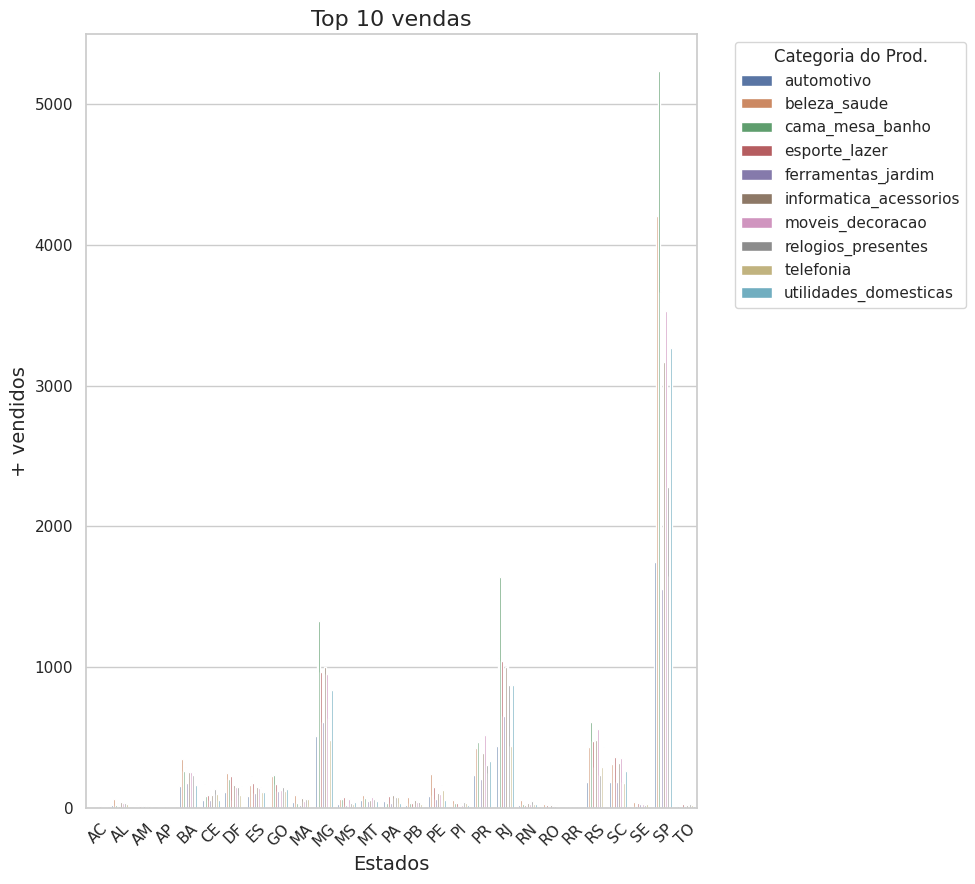

In [ ]:
sn.set(style="whitegrid")
plt.figure(figsize=(10, 9))
sn.barplot(data=produtos_top10, x='customer_state', y='Número de Produtos Vendidos', hue='product_category_name')
plt.title('Top 10 vendas', fontsize=16)
plt.xlabel('Estados', fontsize=14)
plt.ylabel('+ vendidos', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Categoria do Prod.', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
